In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time

### Let's take a look at the top teams in the Bundesliga

In [2]:
#data cleaning
df = pd.read_csv("bundTopGoals.csv")
df = df.head(n=6)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(6):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
print(df)

               Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0      BayernMunich     34     88       61            261          620   
1  BorussiaDortmund     34     81       59            193          443   
2    1899Hoffenheim     34     70       47            226          578   
3   BayerLeverkusen     34     69       52            206          502   
4         RBLeipzig     34     63       40            180          482   
5      VfLWolfsburg     34     62       38            170          413   

   Goals/Game  
0    2.588235  
1    2.382353  
2    2.058824  
3    2.029412  
4    1.852941  
5    1.823529  


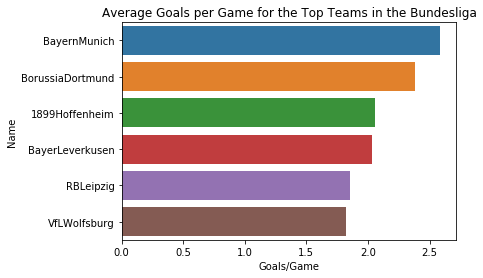

In [3]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in the Bundesliga')
plt.show()

In [4]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(6):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

               Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0      BayernMunich     34     88       61            261          620   
1  BorussiaDortmund     34     81       59            193          443   
2    1899Hoffenheim     34     70       47            226          578   
3   BayerLeverkusen     34     69       52            206          502   
4         RBLeipzig     34     63       40            180          482   
5      VfLWolfsburg     34     62       38            170          413   

   Goals/Game  Shooting Accuracy(%)  Conversion Rate(%)  
0    2.588235             42.096774           33.716475  
1    2.382353             43.566591           41.968912  
2    2.058824             39.100346           30.973451  
3    2.029412             41.035857           33.495146  
4    1.852941             37.344398           35.000000  
5    1.823529             41.162228           36.470588  


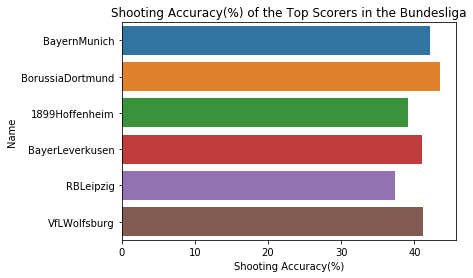

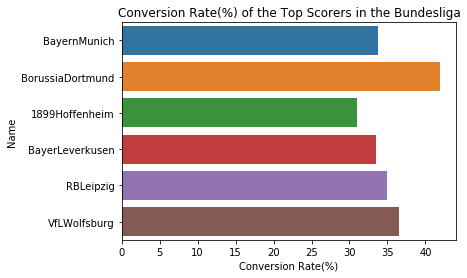

In [6]:
#visualization of top scorers' shooting accuracy and conversion rate
#df2 = df.sort_values(['Shooting Accuracy(%)'])
bar2 = sns.barplot(x='Shooting Accuracy(%)', y='Name', data=df)
plt.title('Shooting Accuracy(%) of the Top Scorers in the Bundesliga')
plt.show()

#df3 = df.sort_values(['Conversion Rate(%)'])
bar3 = sns.barplot(x='Conversion Rate(%)', y='Name', data=df)
plt.title('Conversion Rate(%) of the Top Scorers in the Bundesliga')
plt.show()